# Dip target
Purpose: Find target best fitted for dips

Initial plan: Use NVI over close

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.volume import NegativeVolumeIndexIndicator
from ta.volatility import BollingerBands
df = pd.read_csv("../data/BTCUSDT-minute.csv")

In [2]:
# d = df.append(df2.iloc[df2.index.get_loc(df.tail(1).index.item())+1:])

In [3]:
len(df)

1988738

In [7]:
df = df[1600000:]

In [8]:
# Temporary solution
import sys
sys.path.insert(0, '..')
import useful_functions as uf
import target as target

In [9]:
i = NegativeVolumeIndexIndicator(df.close, df.volume)
df["nvi"] = i.negative_volume_index()
df["nvi_o_close"] = list(map(lambda n, c: n/c, df.nvi, df.close))
df["nvi_o_close_rate_50"] = uf.get_rate(uf.get_moving_average(df.nvi_o_close, 50))

In [10]:
d = df[-5000:]

AttributeError: 'DataFrame' object has no attribute 'target'

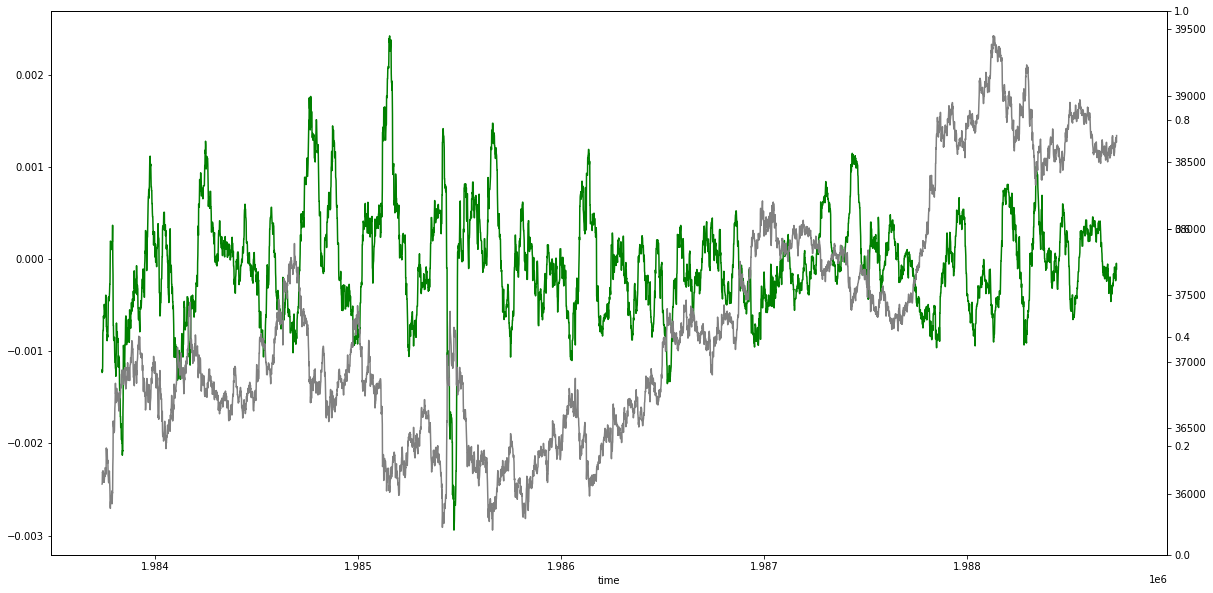

In [11]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(d.nvi_o_close_rate_50,
        color="green")
ax.set_xlabel("time")
# ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(d.close,
         color="gray")

ax3=ax.twinx()
ax3.plot(d.target,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

(array([1.00000e+00, 6.60000e+01, 4.29300e+03, 3.83552e+05, 6.73000e+02,
        5.60000e+01, 1.40000e+01, 1.20000e+01, 2.00000e+01, 1.00000e+00]),
 array([-0.01140389, -0.00793402, -0.00446415, -0.00099427,  0.0024756 ,
         0.00594547,  0.00941535,  0.01288522,  0.01635509,  0.01982497,
         0.02329484]),
 <BarContainer object of 10 artists>)

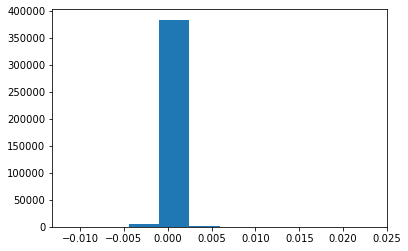

In [12]:
plt.hist(df["nvi_o_close_rate_50"])

In [14]:
df["target_base"] = target.get_wr_target(df.close, 200, 0., False)

In [15]:
df.target_base.value_counts()

1    197234
0    191504
Name: target_base, dtype: int64

In [16]:
df["nvi_classified"] = uf.classify(df.nvi_o_close_rate_50, 0.)

In [17]:
df.nvi_classified.value_counts()

1    196464
0    192274
Name: nvi_classified, dtype: int64

In [18]:
df["target"] = target.zip_target(df.target_base, df.nvi_classified)

In [19]:
df.target.value_counts(), df.target.value_counts()[1]/df.target.value_counts()[0]

(0    289772
 1     98966
 Name: target, dtype: int64,
 0.3415305826649918)

In [20]:
i = BollingerBands(df.close, window=100, window_dev=2)
df["bb"] = i.bollinger_pband()

In [21]:
df["bb"] = uf.classify(list(map(lambda x: -x, df.bb)), -0.2)

In [22]:
df.bb.value_counts()

0    311408
1     77330
Name: bb, dtype: int64

In [23]:
df["target"] = target.zip_target(df.target, df.bb)

In [24]:
df.target.value_counts(), df.target.value_counts()[1]/df.target.value_counts()[0]

(0    352894
 1     35844
 Name: target, dtype: int64,
 0.10157157673409012)

In [118]:
d = df[14000:18000]

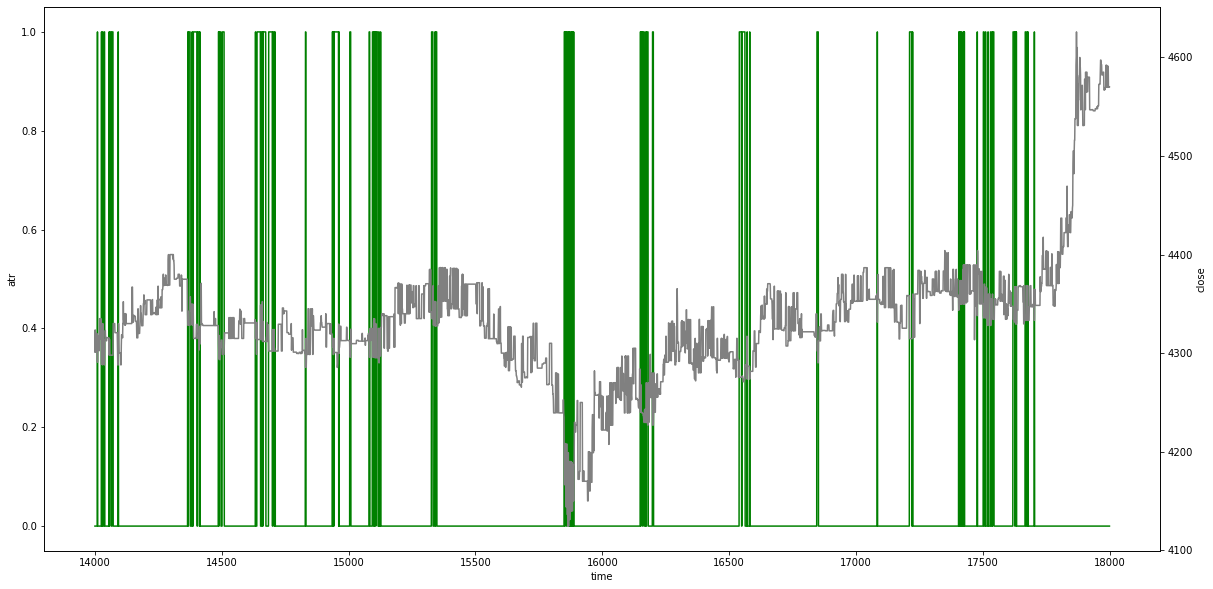

In [119]:
fig,ax = plt.subplots(figsize=(20, 10))
ax.plot(d.target,
        color="green")
ax.set_xlabel("time")
ax.set_ylabel("atr")

ax2=ax.twinx()
ax2.plot(d.close,
         color="gray")

ax2.set_ylabel("close")
# fig.legend(["a", "b", "c", "d"])
plt.show()

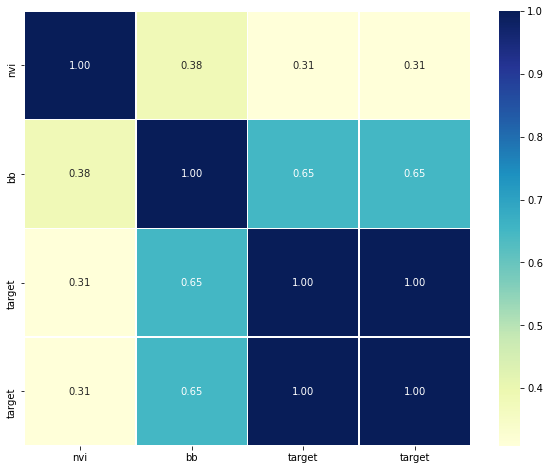

In [120]:
indicators = list(df.columns)[12:]
indicators.append("target")

d = df[list(indicators)].copy()[:-1000]
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## Adding target and nvi_o_close_rate_50 as nvi

In [115]:
# df = pd.read_csv("../data/BTCUSDT-hour-target.csv")
df = pd.read_csv("../data/BTCUSDT-minute.csv")
df.drop(['target'], inplace=True, errors='ignore')

In [116]:
# df = df[-40000:]

In [117]:
i = NegativeVolumeIndexIndicator(df.close, df.volume)
nvi_o_close = pd.Series(list(map(lambda n, c: n/c, i.negative_volume_index(), df.close)))
nvi = uf.get_rate(uf.get_moving_average(nvi_o_close, 50))
df["nvi"] = uf.classify(nvi, 0.)

target_base = target.get_wr_target(df.close, 500, 0.) #Default 200
target_nvi = target.zip_target(target_base, df.nvi)

i = BollingerBands(df.close, window=100, window_dev=2)
df["bb"] = i.bollinger_pband()
df["bb"] = uf.classify(list(map(lambda x: -x, df.bb)), -0.2)
df["target"] = target.zip_target(target_nvi, df.bb)

In [121]:
df.target.value_counts(), df.target.value_counts()[1]/df.target.value_counts()[0]

(0    1805244
 1     183494
 Name: target, dtype: int64,
 0.10164498538701694)

In [122]:
df.to_csv("../data/BTCUSDT-minute-target-dip.csv", index=False) #Default